In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import numpy as np
import numpy as np 
import pandas as pd
import os
print(os.listdir("C://Users//Dell_USA//Downloads//input"))

['sampleSubmission.csv', 'test1', 'test2', 'train']


(280, 300, 3)


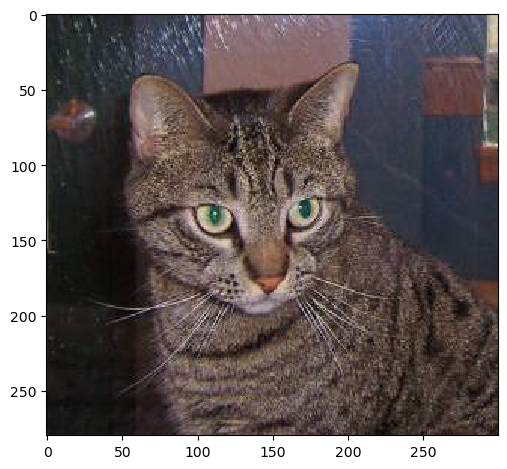

In [2]:
from skimage import io
cat1 = io.imread('C://Users//Dell_USA//Downloads//input/train/cat.1.jpg')
io.imshow(cat1)
print(cat1.shape)

In [3]:
from skimage.transform import resize
X_train=[]
Y_train=[]
for i in range(0,2000):
    cat = io.imread('C://Users//Dell_USA//Downloads//input/train/cat.{}.jpg'.format(i))
    catend = resize(cat, (100,100,3))
    X_train.append(catend)
    Y_train.append(1)
for i in range(0,2000):
    dog = io.imread('C://Users//Dell_USA//Downloads//input/train/dog.{}.jpg'.format(i))
    dogend = resize(dog, (100,100,3))
    X_train.append(dogend)
    Y_train.append(0)

In [4]:
X_train, Y_train = np.asarray(X_train), np.asarray(Y_train) 
print('X_train shape: ', X_train.shape, 'Y_train shape: ',Y_train.shape)

X_train shape:  (4000, 100, 100, 3) Y_train shape:  (4000,)


In [5]:
Y_train = Y_train.reshape(len(Y_train), 1)

In [6]:
print(X_train)

[[[[8.03657012e-01 6.50715836e-01 3.48755051e-01]
   [8.21522497e-01 6.68581321e-01 3.66620537e-01]
   [8.36966787e-01 6.83422011e-01 3.81310326e-01]
   ...
   [9.67302755e-01 8.20892321e-01 5.04802403e-01]
   [9.63655283e-01 8.06290180e-01 4.82836463e-01]
   [9.46624751e-01 7.91971663e-01 4.77890713e-01]]

  [[8.03657449e-01 6.50716273e-01 3.48755488e-01]
   [8.21570965e-01 6.68629788e-01 3.66669004e-01]
   [8.36922318e-01 6.83377541e-01 3.81265857e-01]
   ...
   [9.68506815e-01 8.27411203e-01 5.16098126e-01]
   [9.63464323e-01 8.12868014e-01 4.94504607e-01]
   [9.51237726e-01 7.97768904e-01 4.85564351e-01]]

  [[8.03665700e-01 6.50724523e-01 3.48763739e-01]
   [8.22486483e-01 6.69545306e-01 3.67584522e-01]
   [8.36082319e-01 6.82537543e-01 3.80425859e-01]
   ...
   [9.68678329e-01 8.36984351e-01 5.32987377e-01]
   [9.62092519e-01 8.19268183e-01 5.06487290e-01]
   [9.56300564e-01 8.05172636e-01 4.94132727e-01]]

  ...

  [[6.24649580e-01 4.91415640e-01 2.13116791e-01]
   [6.32103965e-

In [7]:
#X_train = X_train/255.0

In [8]:
#print(X_train)

In [9]:
import matplotlib.pyplot as plt
import random

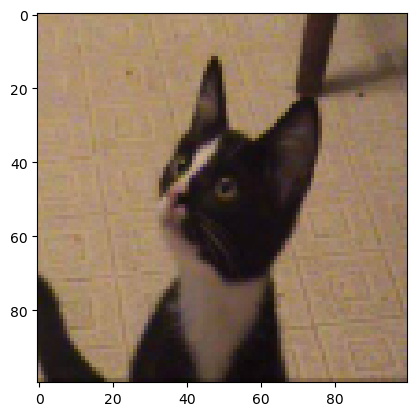

In [10]:
idx = random.randint(0 , len(X_train))
plt.imshow(X_train[idx, :])

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
           
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])

In [21]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)),)

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [22]:
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [24]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.8053 - loss: 0.4540
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.8316 - loss: 0.3769
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.8470 - loss: 0.3381
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.8906 - loss: 0.2638
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.9261 - loss: 0.1992


In [26]:
model.evaluate(X_train, Y_train)

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9655 - loss: 0.1256


[0.17334683239459991, 0.9399999976158142]

In [27]:
from skimage.transform import resize
X_test=[]
Y_test=[]
for i in range(2000,3000):
    cat = io.imread('C://Users//Dell_USA//Downloads//input/test1/{}.jpg'.format(i))
    catend = resize(cat, (100,100,3))
    X_test.append(catend)
    Y_test.append(1)
for i in range(2000,3000):
    dog = io.imread('C://Users//Dell_USA//Downloads//input/train/dog.{}.jpg'.format(i))
    dogend = resize(dog, (100,100,3))
    X_test.append(dogend)
    Y_test.append(0)

In [28]:
X_test, Y_test = np.asarray(X_test), np.asarray(Y_test) 
print('X_test shape: ', X_test.shape, 'Y_test shape: ',Y_test.shape)

X_test shape:  (2000, 100, 100, 3) Y_test shape:  (2000,)


In [29]:
Y_train = Y_train.reshape(len(Y_train), 1)

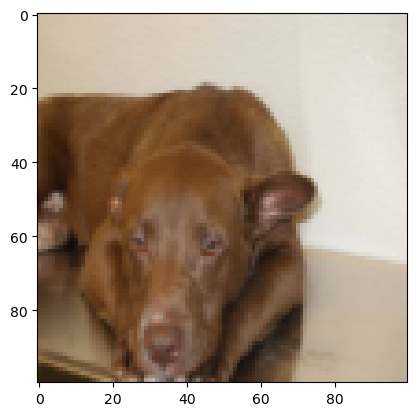

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.37538356]]
dog


In [45]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
print(y_pred)
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print(pred)